In [1]:
# Neural Network classification with pytorch

# make classification data

In [2]:
import sklearn
from sklearn.datasets import make_circles

In [3]:
# make 1000 samples
n_samples = 1000

X,y = make_circles(n_samples=n_samples,
                  noise=0.03,
                  random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"first 5 samples of X: {X[:5]}")
print(f"first 5 samples of y: {y[:5]}")

first 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y: [1 1 1 1 0]


In [6]:
# make dataset of circles
import pandas as pd
circles = pd.DataFrame({'X1':X[:,0],
                       'X2':X[:,1],
                       'label':y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


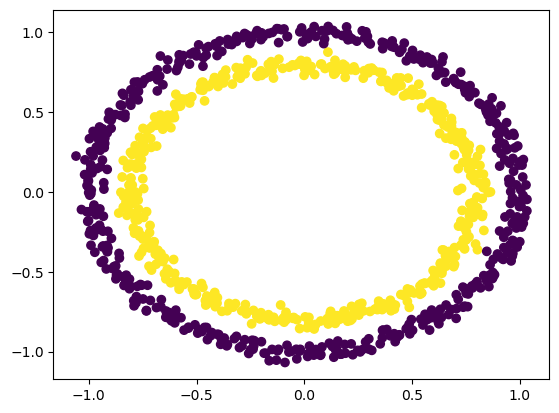

In [7]:
# visualize
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],y = X[:,1],c = y)

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [10]:
# turn data into tensors and create train and test splits
import torch
torch.__version__

'2.0.1+cpu'

In [11]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [13]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [14]:
type(X), X.dtype

(torch.Tensor, torch.float32)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test)

(800, 200)

In [17]:
# BUild a model to classifiy dots
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [18]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [19]:
# construct model
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer_1 = nn.Linear(in_features=2,out_features=5)
        self.layer_2 = nn.Linear(in_features=5,out_features=1)
        
    def forward(self, x):
        return self.layer_2(self.layer_1(x))
    
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
list(model_0.parameters())

[Parameter containing:
 tensor([[-0.0814,  0.1435],
         [ 0.3866, -0.5047],
         [-0.3889,  0.4554],
         [ 0.2399,  0.6653],
         [-0.3971,  0.5637]], requires_grad=True),
 Parameter containing:
 tensor([ 0.5758,  0.3828, -0.2775,  0.4372,  0.2595], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0209,  0.3701,  0.0323,  0.3054, -0.0875]], requires_grad=True),
 Parameter containing:
 tensor([-0.3073], requires_grad=True)]

In [21]:
# lets replicate above using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5037,  0.0173],
                      [ 0.5051,  0.4533],
                      [ 0.0061, -0.5351],
                      [-0.2581,  0.0362],
                      [-0.0640, -0.7025]])),
             ('0.bias', tensor([ 0.3314,  0.3867,  0.1539,  0.0670, -0.6688])),
             ('1.weight',
              tensor([[-0.3350, -0.3902, -0.3146, -0.0868,  0.1191]])),
             ('1.bias', tensor([-0.2494]))])

In [23]:
# make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples:{len(X_test)} , shape: {X_test.shape}")
print(f"\nfirst 10 predictions:\n{untrained_preds[:10]}")
print(f"first 10 labels:\n{y_test[:10]}")

Length of predictions: 200, shape: torch.Size([200, 1])
Length of test samples:200 , shape: torch.Size([200, 2])

first 10 predictions:
tensor([[-0.5818],
        [-0.7477],
        [-0.3653],
        [-0.6423],
        [-0.7120],
        [-0.8106],
        [-1.0030],
        [-1.0186],
        [-0.3510],
        [-0.7627]])
first 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [24]:
# y_test, 

In [25]:
# setup loss function
# loss_fn = nn.BCELoss()
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [26]:
# calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) *100
    return acc

In [27]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.5818],
        [-0.7477],
        [-0.3653],
        [-0.6423],
        [-0.7120]])

In [28]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [29]:
# use sigmoid activation on out logits to turn into preds probs
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3585],
        [0.3213],
        [0.4097],
        [0.3447],
        [0.3292]])

In [30]:
y_preds = torch.round(y_pred_probs)
y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [31]:
%%time
# building training and testing loop
torch.manual_seed(42)

# set epochs
epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    
    model_0.train()
    
    # forward pass
    y_logits = model_0(X_train).squeeze()
    # y_logits = model_0(X_train)
    # print(y_logits)
    # print(y_logits)
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits to probs to lables
    
    # calculate loss
    # loss = loss_fn(torch.sigmoid(y_logits),# nn.BCELOSS expects probs
    #               y_train)
    loss = loss_fn(y_logits, # nn.BCEWIthLogitloss expects raw logits
                  y_train)
    acc = accuracy_fn(y_true=y_train,
                     y_pred=y_pred)
    
    # optimizer zero grad
    optimizer.zero_grad()
    
    # loss backward
    loss.backward()
    
    #optimizer step (update parameters)
    optimizer.step()
    
    # testing
    model_0.eval()
    with torch.inference_mode():
        #forward pass
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        
        # calculate test loss
        test_loss = loss_fn(test_logits,
                           y_test)
        test_acc = accuracy_fn(y_true = y_test,
                              y_pred = test_preds)
        
    #print what happes
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss:{loss:.5f}, Acc:{acc:.2f}% | Test loss:{test_loss:.5f},Test acc:{test_acc:.2f}%")

Epoch: 0 | Loss:0.75147, Acc:50.00% | Test loss:0.74063,Test acc:50.00%
Epoch: 10 | Loss:0.71538, Acc:50.00% | Test loss:0.70996,Test acc:50.00%
Epoch: 20 | Loss:0.70264, Acc:46.75% | Test loss:0.69993,Test acc:45.50%
Epoch: 30 | Loss:0.69785, Acc:46.00% | Test loss:0.69666,Test acc:45.50%
Epoch: 40 | Loss:0.69593, Acc:48.75% | Test loss:0.69564,Test acc:45.00%
Epoch: 50 | Loss:0.69508, Acc:50.00% | Test loss:0.69535,Test acc:46.00%
Epoch: 60 | Loss:0.69465, Acc:49.88% | Test loss:0.69527,Test acc:48.00%
Epoch: 70 | Loss:0.69439, Acc:49.25% | Test loss:0.69524,Test acc:52.00%
Epoch: 80 | Loss:0.69421, Acc:49.12% | Test loss:0.69522,Test acc:51.00%
Epoch: 90 | Loss:0.69407, Acc:49.38% | Test loss:0.69518,Test acc:51.00%
Wall time: 163 ms


In [32]:
# make predictions
import requests
from pathlib import Path

# download helper functions from pytorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
    
else:
    print("Download helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
        

helper_functions.py already exists, skipping download


In [33]:
from helper_functions import plot_predictions,plot_decision_boundary

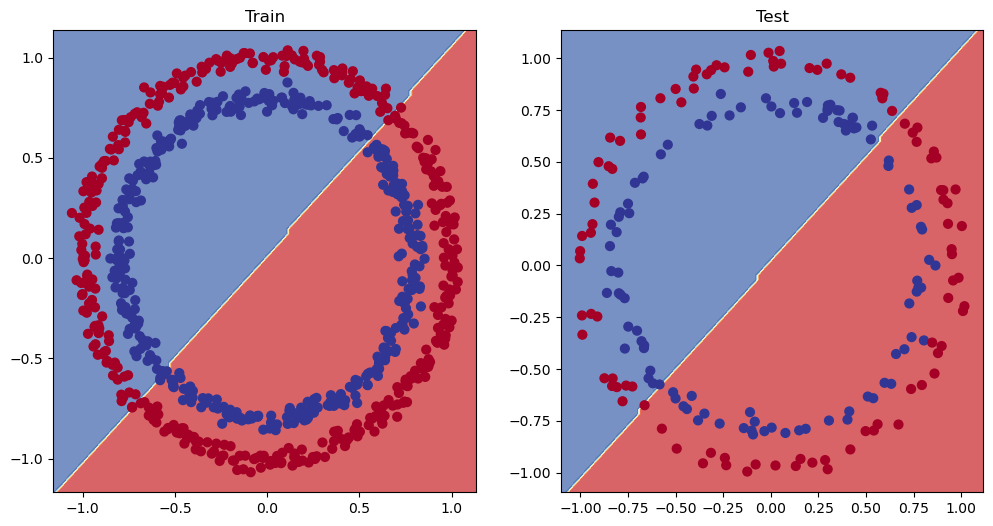

In [34]:
#plot decision boundary of model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test, y_test)

In [35]:
# Improving a model
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))
    
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [36]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [37]:
#create loss function
loss_fn = nn.BCEWithLogitsLoss()

# create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [38]:
torch.manual_seed(42)

epochs = 1000

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    
    model_1.train()
    
    y_logits = model_1(X_train).squeeze()
    
    y_preds = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits,
                  y_train)
    
    acc = accuracy_fn(y_true = y_train,y_pred = y_preds)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    #testing
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        
        test_preds = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits,y_test)
        
        test_acc = accuracy_fn(y_true=y_test,y_pred = test_preds)
        
    
    if epoch % 100 == 0:
        print(f"Epoch:{epoch} | loss:{loss:.5f}, Acc:{acc:.2f}% | test loss:{test_loss:.5f}, test acc:{test_acc:.2f}%")

Epoch:0 | loss:0.69396, Acc:50.88% | test loss:0.69261, test acc:51.00%
Epoch:100 | loss:0.69305, Acc:50.38% | test loss:0.69379, test acc:48.00%
Epoch:200 | loss:0.69299, Acc:51.12% | test loss:0.69437, test acc:46.00%
Epoch:300 | loss:0.69298, Acc:51.62% | test loss:0.69458, test acc:45.00%
Epoch:400 | loss:0.69298, Acc:51.12% | test loss:0.69465, test acc:46.00%
Epoch:500 | loss:0.69298, Acc:51.00% | test loss:0.69467, test acc:46.00%
Epoch:600 | loss:0.69298, Acc:51.00% | test loss:0.69468, test acc:46.00%
Epoch:700 | loss:0.69298, Acc:51.00% | test loss:0.69468, test acc:46.00%
Epoch:800 | loss:0.69298, Acc:51.00% | test loss:0.69468, test acc:46.00%
Epoch:900 | loss:0.69298, Acc:51.00% | test loss:0.69468, test acc:46.00%


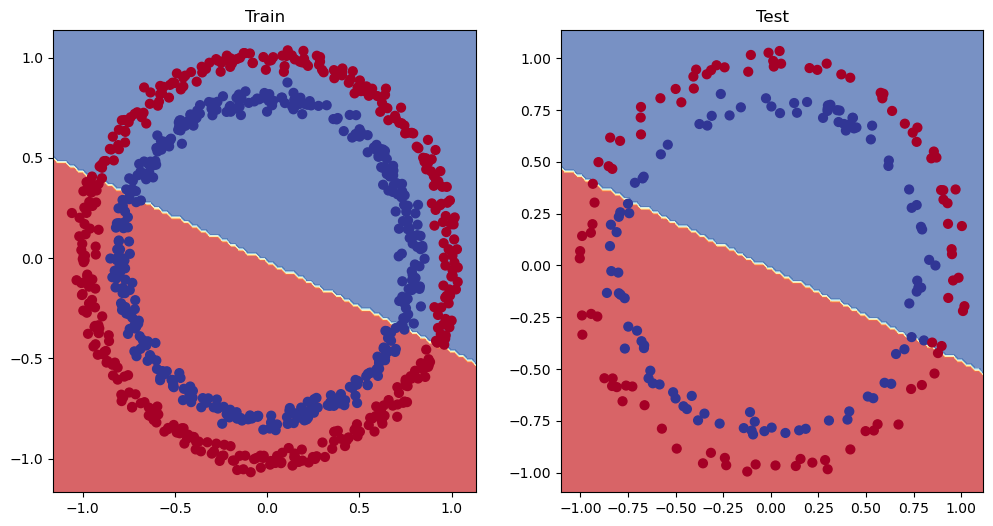

In [39]:
#plot decision boundary of model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test, y_test)

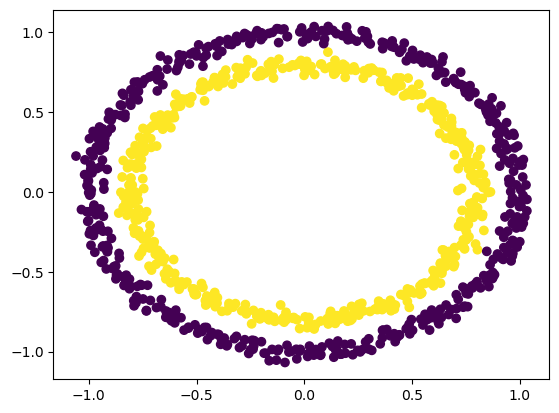

In [40]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples=n_samples,noise=0.03,random_state=42)
plt.scatter(X[:,0],X[:,1],c = y);

In [41]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [42]:
# build model with non linear functions
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # non linear activation
        
    def forward(self, x):
        
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
    
model_3 = CircleModelV2().to(device)
model_3 

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [43]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_3.parameters(),lr=0.1)

In [44]:
torch.manual_seed(42)

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

epochs = 1500

for epoch in range(epochs):
    model_3.train()
    
    y_logits = model_3(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits,y_train)
    
    acc = accuracy_fn(y_true=y_train,y_pred=y_preds)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    #testing
    
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        
        test_preds = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits,y_test)
        
        test_acc = accuracy_fn(y_true = y_test,y_pred=test_preds)
        
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | loss:{loss:.4f} acc:{acc:.2f}% | test loss:{test_loss:.4f} test acc:{test_acc:.2f}%")

Epoch: 0 | loss:0.6929 acc:50.00% | test loss:0.6932 test acc:50.00%
Epoch: 100 | loss:0.6912 acc:52.88% | test loss:0.6910 test acc:52.50%
Epoch: 200 | loss:0.6898 acc:53.37% | test loss:0.6894 test acc:55.00%
Epoch: 300 | loss:0.6879 acc:53.00% | test loss:0.6872 test acc:56.00%
Epoch: 400 | loss:0.6852 acc:52.75% | test loss:0.6841 test acc:56.50%
Epoch: 500 | loss:0.6810 acc:52.75% | test loss:0.6794 test acc:56.50%
Epoch: 600 | loss:0.6751 acc:54.50% | test loss:0.6729 test acc:56.00%
Epoch: 700 | loss:0.6666 acc:58.38% | test loss:0.6632 test acc:59.00%
Epoch: 800 | loss:0.6516 acc:64.00% | test loss:0.6476 test acc:67.50%
Epoch: 900 | loss:0.6236 acc:74.00% | test loss:0.6215 test acc:79.00%
Epoch: 1000 | loss:0.5682 acc:87.75% | test loss:0.5738 test acc:86.50%
Epoch: 1100 | loss:0.4815 acc:93.50% | test loss:0.4993 test acc:90.50%
Epoch: 1200 | loss:0.3706 acc:97.75% | test loss:0.4059 test acc:92.00%
Epoch: 1300 | loss:0.2546 acc:99.00% | test loss:0.3033 test acc:96.50%
Epoc

In [45]:
# evaluating the model
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test).squeeze()))
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

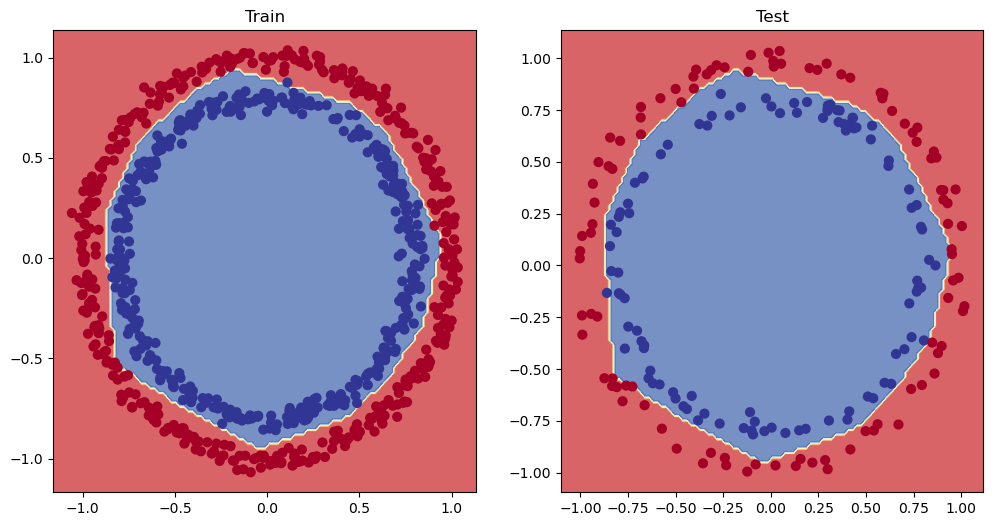

In [46]:
#plot decison boundary
#plot decision boundary of model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test, y_test)

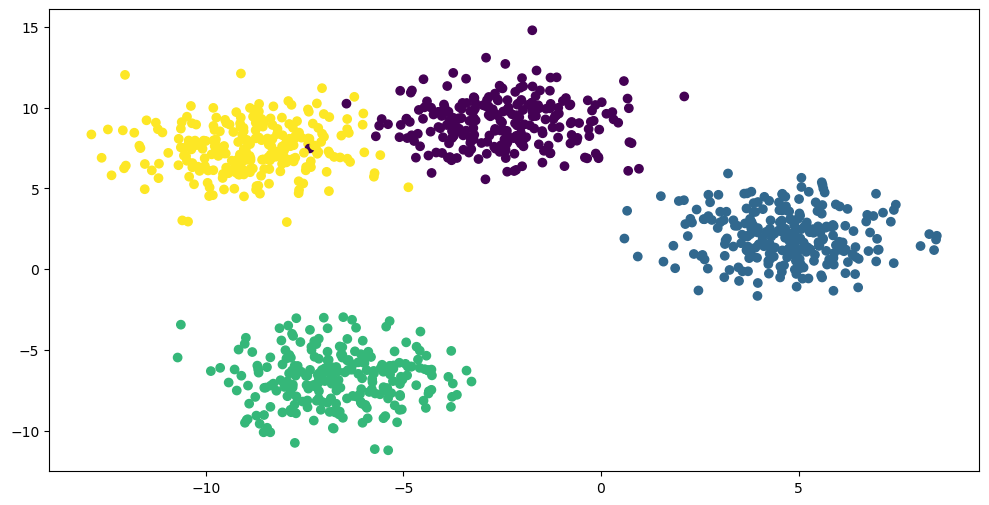

In [47]:
# create a multiclass dataset
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

num_classes = 4
num_features = 2
random_seed = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                           n_features=num_features,
                           centers=num_classes,
                           cluster_std=1.5,
                            random_state=random_seed)

# turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob,test_size=0.2,
                                                                       random_state=random_seed)

plt.figure(figsize=(12,6))
plt.scatter(X_blob[:,0], X_blob[:,1],c = y_blob)

In [48]:
#buildong a model to classify the above
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cpu'

In [49]:
class BlobModel(nn.Module):
    def __init__(self,input_features,output_features,hidden_units = 8):
        """Initializes a multiclass classification model.
        
        Args:
            input_features (int) : Number of input features
            output_featyres (int): number of output features
            hidden units (iint): number of neurons between layers
        Returns:
        
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_features)
        )
        
    def forward(self,x):
        return self.linear_layer_stack(x)
        

model_4 = BlobModel(input_features=2,
                   output_features=4,
                   hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [50]:
#create loss function for multiclass classification
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(),
                           lr=0.1)

In [51]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
y_logits[:10] # logits

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [52]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [53]:
# convert model logits to probs
y_pred_probs = torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [54]:
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [55]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [56]:
y_blob_train.shape,y_logits.shape

(torch.Size([800]), torch.Size([200, 4]))

In [57]:
# creating training and testing loop
torch.manual_seed(42)

epochs = 100

X_blob_train = X_blob_train.to(device)
y_blob_train = y_blob_train.to(device)
X_blob_test = X_blob_test.to(device)
y_blob_test = y_blob_test.to(device)

for epoch in range(epochs):
    
    model_4.train()
    
    y_logits = model_4(X_blob_train).squeeze()
    
    y_preds = torch.softmax(y_logits,dim=1).argmax(dim=1)
    
    loss = loss_fn(y_logits,y_blob_train)
    
    acc = accuracy_fn(y_true = y_blob_train,y_pred=y_preds)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    #testing
    model_4.eval()
    with torch.inference_mode():
        
        test_logits = model_4(X_blob_test).squeeze()
        
        test_preds = torch.softmax(test_logits,dim=1).argmax(dim=1)
        
        test_loss = loss_fn(test_logits,y_blob_test)
        
        test_acc = accuracy_fn(y_true=y_blob_test,
                              y_pred=test_preds)
        
    if epoch % 10 == 0:
        print(f"Epoch:{epoch} | loss:{loss:.4f}, acc:{acc:.2f}% | Test loss:{test_loss:.4f} Test acc:{test_acc:.2f}%")

Epoch:0 | loss:1.1588, acc:40.38% | Test loss:1.0755 Test acc:48.00%
Epoch:10 | loss:0.6448, acc:96.75% | Test loss:0.6607 Test acc:97.50%
Epoch:20 | loss:0.4254, acc:98.50% | Test loss:0.4307 Test acc:100.00%
Epoch:30 | loss:0.2529, acc:99.12% | Test loss:0.2451 Test acc:99.50%
Epoch:40 | loss:0.1123, acc:99.25% | Test loss:0.1023 Test acc:99.50%
Epoch:50 | loss:0.0663, acc:99.25% | Test loss:0.0585 Test acc:99.50%
Epoch:60 | loss:0.0507, acc:99.25% | Test loss:0.0429 Test acc:99.50%
Epoch:70 | loss:0.0430, acc:99.25% | Test loss:0.0349 Test acc:99.50%
Epoch:80 | loss:0.0384, acc:99.25% | Test loss:0.0299 Test acc:99.50%
Epoch:90 | loss:0.0352, acc:99.25% | Test loss:0.0266 Test acc:99.50%


In [58]:
#make predictiosm
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [59]:
y_pred_probs = torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [60]:
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [61]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

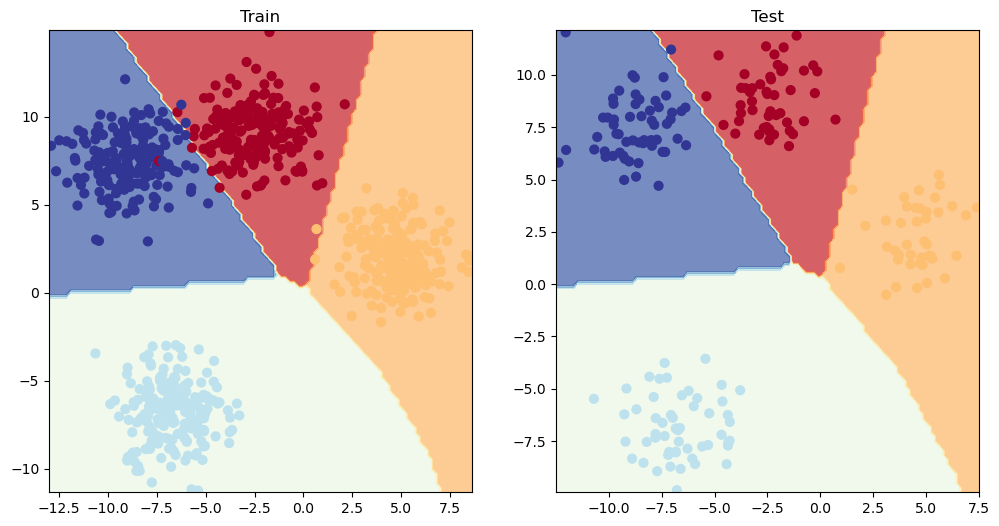

In [62]:
#plot decison boundary
#plot decision boundary of model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test, y_blob_test)

In [63]:
from torchmetrics import Accuracy

accuracy = Accuracy(task="multiclass", num_classes=4)
accuracy(y_preds, y_blob_test)

tensor(0.9950)